In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
train_data = pd.read_csv("train.csv")
train_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [4]:
test_data = pd.read_csv("test.csv")

# Data Cleaning and Preprocessing

In [5]:
train_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
print(train_data.duplicated().sum())

0


In [7]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Dropping "id", "CustomerId", "Surname" columns as they might not make much of a difference to the final predictions

In [8]:
train_data1 = train_data.drop(["id", "CustomerId", "Surname"], axis = 1)

In [9]:
train_data1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

### Applying one-hot encoding to 'Geography' and 'Gender' columns which converts these feature values into type 'int' and also provides
### additional feature which can be correlated with the target feature i.e.'Exited'

### Also applied one-hot encoding instead of ordinal encoding as ordinal encoding is beneficial when there exists a hierarchy
### among the categorical values which wasn't the case here.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
test_data1 = test_data.drop(["id", "CustomerId", "Surname"], axis = 1)

In [12]:
n1 = pd.get_dummies(train_data1["Geography"])

In [13]:
n1 = n1.astype("int")

In [14]:
train_data2 = pd.concat([train_data1, n1], axis = 1)

In [15]:
n2 = pd.get_dummies(train_data2["Gender"])

In [16]:
n2 = n2.astype("int")

In [17]:
train_data2 = pd.concat([train_data2, n2], axis = 1)

In [18]:
train_data2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1,1,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0,0,1
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0,0,1
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1,1,0


In [19]:
train_data3 = train_data2.drop(["Geography", "Gender", "Male"], axis = 1)

In [20]:
train_data3

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1,1
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0,0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0,0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1,1


In [21]:
train_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Age              165034 non-null  float64
 2   Tenure           165034 non-null  int64  
 3   Balance          165034 non-null  float64
 4   NumOfProducts    165034 non-null  int64  
 5   HasCrCard        165034 non-null  float64
 6   IsActiveMember   165034 non-null  float64
 7   EstimatedSalary  165034 non-null  float64
 8   Exited           165034 non-null  int64  
 9   France           165034 non-null  int32  
 10  Germany          165034 non-null  int32  
 11  Spain            165034 non-null  int32  
 12  Female           165034 non-null  int32  
dtypes: float64(5), int32(4), int64(4)
memory usage: 13.9 MB


In [22]:
test_data1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...
110018,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [23]:
t1 = pd.get_dummies(test_data1["Geography"])
t1 = t1.astype("int")
test_data2 = pd.concat([test_data1, t1], axis = 1)
test_data2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,1
110019,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,0
110020,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0
110021,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,0


In [24]:
t2 = pd.get_dummies(test_data1["Gender"])
t2 = t2.astype("int")
test_data2 = pd.concat([test_data2, t2], axis = 1)
test_data2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,1,0
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0,1,0
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,1,0
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,0,1
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,1,0,1
110019,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,0,1,0
110020,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0,0,1
110021,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,0,1,0


In [25]:
test_data3 = test_data2.drop(["Geography", "Gender", "Male"], axis = 1)

In [26]:
test_data3

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,1
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0,1
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,1
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,0
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,1,0
110019,575,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,0,1
110020,712,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0,0
110021,709,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,0,1


In [27]:
test_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      110023 non-null  int64  
 1   Age              110023 non-null  float64
 2   Tenure           110023 non-null  int64  
 3   Balance          110023 non-null  float64
 4   NumOfProducts    110023 non-null  int64  
 5   HasCrCard        110023 non-null  float64
 6   IsActiveMember   110023 non-null  float64
 7   EstimatedSalary  110023 non-null  float64
 8   France           110023 non-null  int32  
 9   Germany          110023 non-null  int32  
 10  Spain            110023 non-null  int32  
 11  Female           110023 non-null  int32  
dtypes: float64(5), int32(4), int64(3)
memory usage: 8.4 MB


# EDA, Data Visualization and Correlation

In [28]:
train_data3.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female
CreditScore,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383,-0.005669,0.002996,0.003833,-0.002310
Age,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768,-0.066439,0.093138,-0.012157,0.063139
Tenure,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565,0.002960,-0.007751,0.004085,-0.008767
Balance,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743,-0.332811,0.539208,-0.132364,0.014699
NumOfProducts,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554,0.063096,-0.103034,0.025889,-0.026098
HasCrCard,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141,0.015839,-0.004988,-0.014037,-0.006418
IsActiveMember,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237,0.017864,-0.036433,0.014473,-0.033722
EstimatedSalary,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827,-0.002085,0.013298,-0.010587,0.007778
Exited,-0.027383,0.340768,-0.019565,0.129743,-0.214554,-0.022141,-0.210237,0.018827,1.000000,-0.130797,0.211054,-0.051175,0.146442
France,-0.005669,-0.066439,0.002960,-0.332811,0.063096,0.015839,0.017864,-0.002085,-0.130797,1.000000,-0.594122,-0.611539,-0.026204


<Axes: >

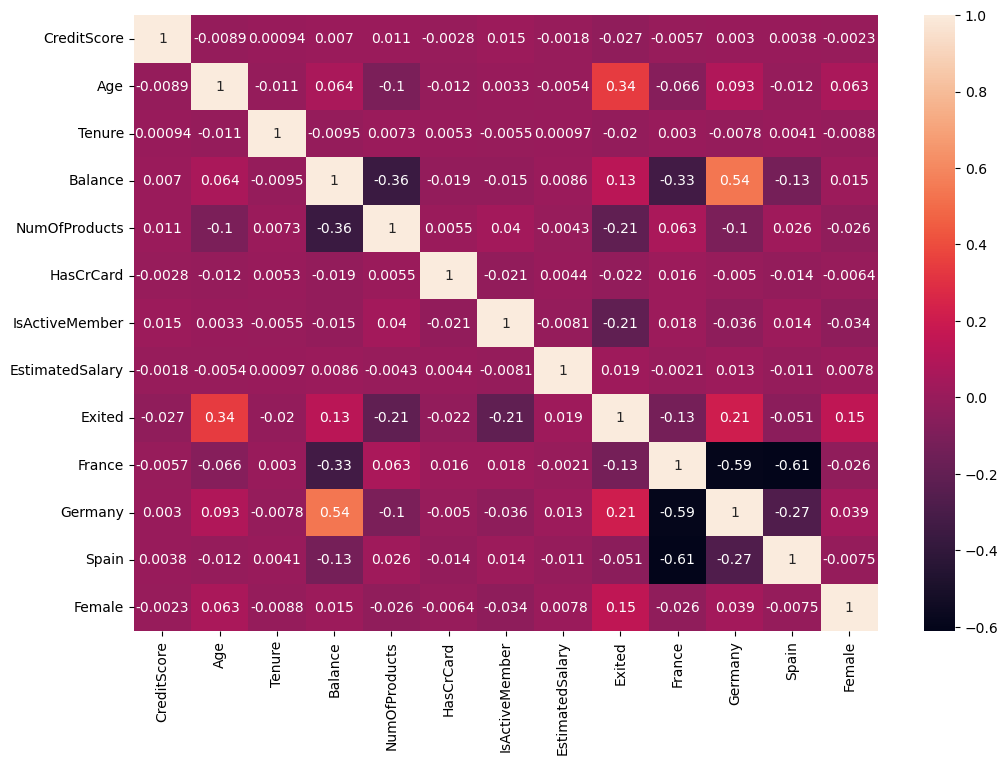

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=train_data3.corr(), annot = True)

### From the above heatmap we can see that the 'Age' feature has the most postive correlation with the target feature
### i.e.'Exited' compared to others which menas that people with more age are most likely to exit the bank.

### Also we can see a strong negative correlation between the 'NumberOfProducts' and 'Isactivemember' features with the 'Exited'
### feature, which tells us that when a person is more active the probability of them exiting is low, also when a client has 
### more products in the bank, they are less probable to exit.

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

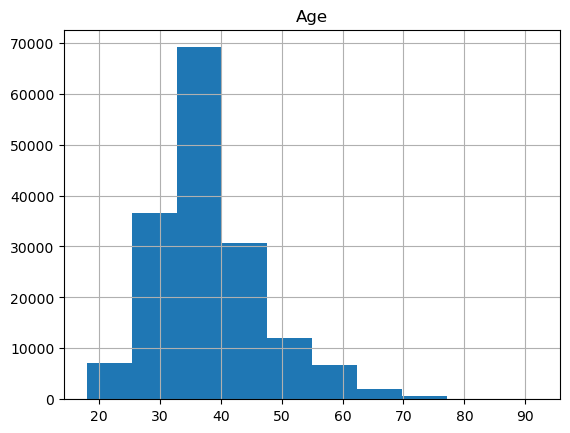

In [30]:
train_data3.hist("Age")

<Axes: xlabel='Exited', ylabel='Age'>

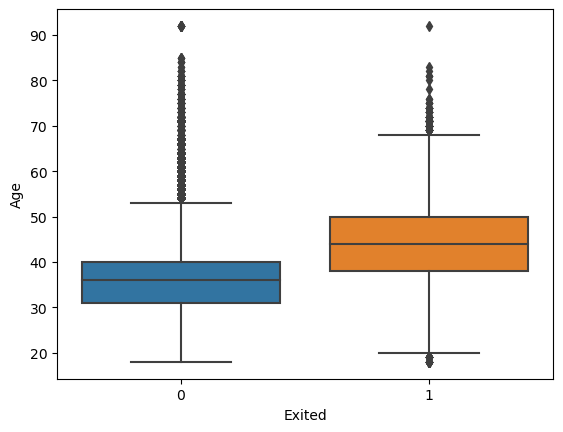

In [31]:
sns.boxplot(x='Exited', y='Age', data=train_data3)

<Axes: xlabel='Exited', ylabel='Age'>

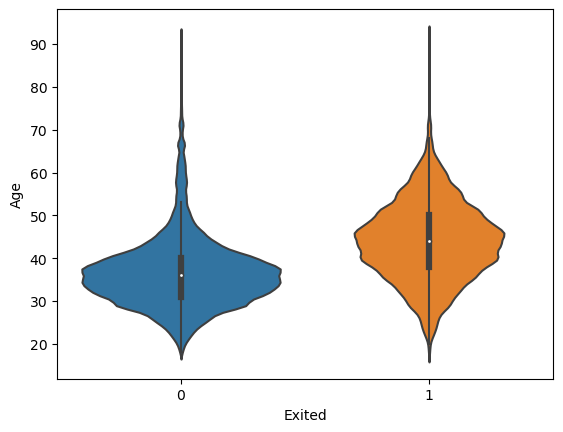

In [32]:
sns.violinplot(x='Exited', y='Age', data=train_data3)

## Removing the duplicated values

In [33]:
print(train_data3.duplicated().sum())

123


In [34]:
train_data3 = train_data3.drop_duplicates()

In [35]:
print(train_data3.duplicated().sum())

0


In [36]:
train_data3

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1,1
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0,0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0,0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1,1


# Modelling

In [37]:
X1 = train_data3.iloc[:,0:8]
X2 = train_data3.iloc[:,9:]
X = pd.concat([X1, X2], axis=1)
y = train_data3["Exited"]
print(X.shape)
print(y.shape)

(164911, 12)
(164911,)


## First we split the main training dataset into training and validation datasets using train-test-split(80-20)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

## Here we are using a XGBClassifier model, we use GridSearchCV to find the best parameters

### n_estimators: The number of boosting rounds or trees to build. It represents the number of sequential trees added to the model.

### learning_rate: Also known as the step size or shrinkage, it controls the contribution of each tree to the final prediction. Lower values require more trees but can lead to better generalization.

### max_depth: The maximum depth of each tree. It controls the maximum number of nodes in each tree, influencing the complexity of the model.

In [40]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
model = XGBClassifier()

In [42]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4]
}

In [43]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [45]:
# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Accuracy: 86.56%


In [46]:
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
predictions = final_model.predict(X_valid)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_valid, predictions)

0.8650213746475457

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(y_valid, predictions)

0.1349786253524543

In [52]:
from sklearn.metrics import confusion_matrix

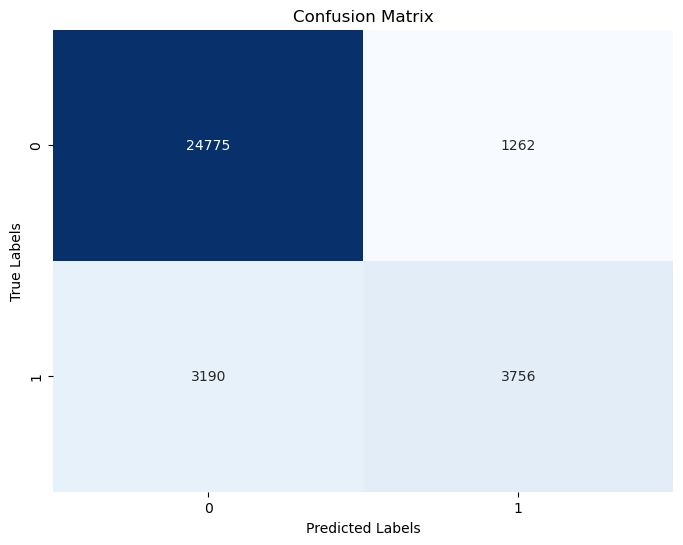

In [53]:
# Compute confusion matrix
cm = confusion_matrix(y_valid, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [54]:
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [55]:
submit_predictions = final_model.predict(test_data3)
submit_predictions

array([0, 1, 0, ..., 0, 0, 0])

In [56]:
#output = pd.DataFrame({"id": test_data.id, "Exited":submit_predictions})
#output.to_csv("Bank_submission_final1.csv", index = False)
#print("Your submission was successfully saved!")

In [57]:
import joblib

In [58]:
# Assuming final_model is your trained machine learning model
joblib.dump(final_model, "bank_churn.joblib")

# Loading the model from joblib format
joblib_model = joblib.load("bank_churn.joblib")

In [59]:
to_predict = np.asarray(test_data3.iloc[1]).reshape(1,-1)
prediction = joblib_model.predict(to_predict)
print(prediction)

[1]
